### Plotagens que fiz de forma avulsa:


In [1]:
import pandas as pd
import plotly.express as px
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('milsa.csv')
data.head(3)

,Funcionario,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
0,1,solteiro,1o Grau,NaN,4.00,26,3,interior
1,2,casado,1o Grau,1.0,4.56,32,10,capital
2,3,casado,1o Grau,2.0,5.25,36,5,capital


In [3]:
#data['Salario'] = data['Salario'].astype(int) # arrumando o tipo de variável na coluna salários

In [4]:
# tabela de frequencia absoluta
data.groupby(['Est.civil', 'Inst']).size().unstack(1)
# função groupby faz agrupamento dos dados
# função size  retorna o tamanho (ou quantidade de registros) de cada combinação de estado civil e instrução.
# função unstack Reorganiza os resultados em um formato de tabela.
# O argumento 1 refere-se à segunda coluna usada no agrupamento, que é Inst.
# Isso transforma os valores da coluna Inst em colunas da nova tabela, criando uma tabela de contingência, onde o índice será os valores da coluna Est.civil e as colunas serão os valores de Inst.

Inst,1o Grau,2o Grau,Superior
Est.civil,,,
casado,5,12,3
solteiro,7,6,3


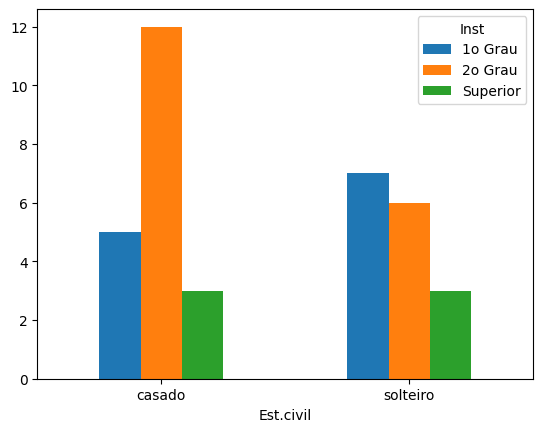

In [5]:
ec_inst = data.groupby(['Est.civil', 'Inst']).size().unstack(1).plot.bar(rot=0)
# funções size e unstack idem explicação acima
# função plt.bar plota o grafico de barras
# parametro "rot=0" posiciona as barras no sentido vertical

In [6]:
fig = px.box(data['Salario'], y='Salario', width=600, height=600)
fig.show()

# Script_TAE_Aula_7 convertido em python:
#### - Execução das linhas de código segue a mesma ordem de execução do script em R.

#### FUNÇÕES PARA O ESTUDO DE DUAS VARIÁVEIS: UMA QUALITATIVA E OUTRA QUANTITATIVA

In [8]:
#Quartis da variável Salario no arquivo milsa.csv
a = data['Salario'].quantile([0, 0.25, 0.5, 0.75, 1]) # função quantile com o parametro dado, retorna o valor dos quartis de  0% até 100%
a

,Salario
0.00,4.0000
0.25,7.5525
0.50,10.1650
0.75,14.0600
1.00,23.3000


In [9]:
#Classes para variável Salario de acordo com os quantis
a1 = pd.cut(data['Salario'], bins=a, include_lowest=True, precision=2)

In [10]:
# Tabela das frequencias absolutas das variáveis Nível de Instrução e Salario
fa_inst_sal = pd.crosstab(index=data['Inst'], columns=a1, margins=True, margins_name='Total')
fa_inst_sal

Salario,"(3.99, 7.55]","(7.55, 10.16]","(10.16, 14.06]","(14.06, 23.3]",Total
Inst,,,,,
1o Grau,7,3,2,0,12
2o Grau,2,6,5,5,18
Superior,0,0,2,4,6
Total,9,9,9,9,36


In [11]:
# Tabela das frequencias relativas das variáveis Nível de Instrução e Salario
fa_inst_sal/fa_inst_sal.loc['Total', 'Total']

Salario,"(3.99, 7.55]","(7.55, 10.16]","(10.16, 14.06]","(14.06, 23.3]",Total
Inst,,,,,
1o Grau,0.194444,0.083333,0.055556,0.000000,0.333333
2o Grau,0.055556,0.166667,0.138889,0.138889,0.500000
Superior,0.000000,0.000000,0.055556,0.111111,0.166667
Total,0.250000,0.250000,0.250000,0.250000,1.000000


In [12]:
# Gráfico a ser apresentado é o Boxplot pois queremos comparar as estatísticas da variável Salario nas categorias da variável Inst
fig = px.box(data[['Salario', 'Inst']], x='Inst', y='Salario', width=600, height=600)
fig.show()

#### Medidas de resumo (média, mediana, desvio padrão, mínimo e máximo) da variavel Salario para cada categoria da variável Inst


In [13]:
data[['Inst', 'Salario']].groupby('Inst')['Salario'].mean() # media

,Salario
Inst,
1o Grau,7.836667
2o Grau,11.528333
Superior,16.475000


In [14]:
data[['Inst', 'Salario']].groupby('Inst')['Salario'].median() # mediana

,Salario
Inst,
1o Grau,7.125
2o Grau,10.910
Superior,16.740


In [15]:
data[['Inst', 'Salario']].groupby('Inst')['Salario'].std() # desvio padrão

,Salario
Inst,
1o Grau,2.956464
2o Grau,3.715144
Superior,4.502438


In [16]:
data[['Inst', 'Salario']].groupby('Inst')['Salario'].min() # minimo

,Salario
Inst,
1o Grau,4.00
2o Grau,5.73
Superior,10.53


In [17]:
data[['Inst', 'Salario']].groupby(data['Inst'])['Salario'].quantile([0, 0.25, 0.5, 0.75, 1]).unstack() # quartis de cada categoria com base no valor 'Salário'

,0.00,0.25,0.50,0.75,1.00
Inst,,,,,
1o Grau,4.00,6.0075,7.125,9.1625,13.85
2o Grau,5.73,8.8375,10.910,14.4175,19.40
Superior,10.53,13.6475,16.740,18.3775,23.30


In [18]:
data[['Inst', 'Salario']].groupby('Inst')['Salario'].max() # máximo

,Salario
Inst,
1o Grau,13.85
2o Grau,19.40
Superior,23.30


##### Ajustar o modelo de ANOVA para o cálculo do coeficiente de determinação

In [19]:
model = ols('Salario ~ Inst', data = data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

              sum_sq    df          F    PR(>F)
Inst      304.420556   2.0  11.623239  0.000151
Residual  432.146267  33.0        NaN       NaN


In [20]:
ss_total = anova_result['sum_sq'].sum()
ss_total

736.5668222222223

In [21]:
ss_modelo = anova_result['sum_sq'][1]
ss_modelo

<ipython-input-21-543e3857b320>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



432.1462666666667

In [99]:
# se próximo de 0: explica mal a variação dos dados
# se próximo de 1: explica bem a variação dos dados
r_squared = 1-(ss_modelo/ss_total)
r_squared

0.41329658948948955

#### FUNÇÕES PARA O ESTUDO DE DUAS VARIÁVEIS QUANTITATIVAS

In [23]:
#Classes para variável Anos de acordo com os quartis
b = data['Anos'].quantile([0, 0.25, 0.5, 0.75, 1])# função quantile com o parametro dado, retorna o valor dos quartis de  0% até 100%
b

,Anos
0.00,20.0
0.25,30.0
0.50,34.5
0.75,40.0
1.00,48.0


In [24]:
#Classes para variável Anos de acordo com os quantis
b1 = pd.cut(data['Anos'], bins=b, include_lowest=True, precision=2)

In [25]:
#Classes para variável Salário de acordo com os quartis
c = data['Salario'].quantile([0, 0.25, 0.5, 0.75, 1])# função quantile com o parametro dado, retorna o valor dos quartis de  0% até 100%
c

,Salario
0.00,4.0000
0.25,7.5525
0.50,10.1650
0.75,14.0600
1.00,23.3000


In [26]:
#Classes para variável Salário de acordo com os quantis
c1 = pd.cut(data['Salario'], bins=c, include_lowest=True, precision=2)

In [28]:
# Tabela das frequencias absolutas das variáveis Anos e Salario
fa_anos_sal = pd.crosstab(index=c1, columns=b1, margins=True, margins_name='Total')
fa_anos_sal

Anos,"(19.99, 30.0]","(30.0, 34.5]","(34.5, 40.0]","(40.0, 48.0]",Total
Salario,,,,,
"(3.99, 7.55]",4,1,2,2,9
"(7.55, 10.16]",2,3,3,1,9
"(10.16, 14.06]",3,2,2,2,9
"(14.06, 23.3]",1,2,3,3,9
Total,10,8,10,8,36


In [29]:
# Tabela das frequencias relativas das variáveis Nível de Instrução e Salario
fa_anos_sal/fa_anos_sal.loc['Total', 'Total']

Anos,"(19.99, 30.0]","(30.0, 34.5]","(34.5, 40.0]","(40.0, 48.0]",Total
Salario,,,,,
"(3.99, 7.55]",0.111111,0.027778,0.055556,0.055556,0.25
"(7.55, 10.16]",0.055556,0.083333,0.083333,0.027778,0.25
"(10.16, 14.06]",0.083333,0.055556,0.055556,0.055556,0.25
"(14.06, 23.3]",0.027778,0.055556,0.083333,0.083333,0.25
Total,0.277778,0.222222,0.277778,0.222222,1.00


In [64]:
# Gráfico a ser apresentado é o de dispersão pois queremos comparar as quantidades das duas variáveis Anos vs Salario
fig = px.scatter(data, x='Anos', y='Salario', width=800, height=600)
fig.update_traces(marker_size=10)
fig.update_layout(title_text='Gráfico de Dispersão', title_x=0.5)
fig.show()

In [80]:
#Coeficiente de correlação das variáveis quantitativas
# Pearson
corr_ano_sal = data[['Anos', 'Salario']].corr(method='pearson')
corr_ano_sal

,Anos,Salario
Anos,1.000000,0.363362
Salario,0.363362,1.000000


In [95]:
#Coeficiente de correlação das variáveis quantitativas
# Spearman
corr_ano_sal = data[['Anos', 'Salario']].corr(method='spearman')
corr_ano_sal

,Anos,Salario
Anos,1.00000,0.29933
Salario,0.29933,1.00000


In [97]:
#Coeficiente de correlação das variáveis quantitativas
# Kendal
corr_ano_sal = data[['Anos', 'Salario']].corr(method='kendall')
corr_ano_sal

,Anos,Salario
Anos,1.000000,0.221164
Salario,0.221164,1.000000
